In [351]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [352]:
def find_duplicate_columns(df):
    duplicates = []
    for i in range(df.shape[1]):
        col1 = df.iloc[:, i]
        for j in range(i + 1, df.shape[1]):
            col2 = df.iloc[:, j]
            if col1.equals(col2):
                duplicates.append((df.columns[i], df.columns[j]))
    return duplicates

In [353]:
us_states = {
    "Northeast": [
        "Maine",
        "New Hampshire",
        "Vermont",
        "Massachusetts",
        "Rhode Island",
        "Connecticut",
        "New York",
        "New Jersey",
        "Pennsylvania"
    ],
    "Midwest": [
        "Ohio",
        "Indiana",
        "Illinois",
        "Iowa",
        "Michigan",
        "Wisconsin",
        "Minnesota",
        "North Dakota",
        "South Dakota",
        "Nebraska",
        "Kansas",
        "Missouri"
    ],
    "South": [
        "Delaware",
        "Maryland",
        "Virginia",
        "West Virginia",
        "North Carolina",
        "South Carolina",
        "Georgia",
        "Florida",
        "Alabama",
        "Mississippi",
        "Tennessee",
        "Kentucky",
        "Arkansas",
        "Louisiana",
        "Texas",
        "Oklahoma"
    ],
    "West": [
        "Montana",
        "Idaho",
        "Wyoming",
        "Colorado",
        "Utah",
        "Nevada",
        "New Mexico",
        "Arizona",
        "Washington",
        "Oregon",
        "California",
        "Alaska",
        "Hawaii"
    ],
    "51st State Idea": [
        "Washington, D.C.",
        "Puerto Rico"
    ]
}

# Example of how to access the states
#print(us_states["Northeast"])

In [354]:
# Dictionary mapping full state names to their abbreviations
state_abbreviations = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'D.C.',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'National': 'NA'
}

def get_state_abbreviation(state_name):
    return state_abbreviations.get(state_name, "Invalid state name")  #"Invalid state name is DC, Washington, D.C. (District of Columbia) - DC"

In [355]:
def get_region(state):
    northeast = [
        "Maine", "New Hampshire", "Vermont", "Massachusetts", "Rhode Island",
        "Connecticut", "New York", "New Jersey", "Pennsylvania"
    ]
    midwest = [
        "Ohio", "Indiana", "Illinois", "Iowa", "Michigan",
        "Wisconsin", "Minnesota", "North Dakota", "South Dakota",
        "Nebraska", "Kansas", "Missouri"
    ]
    south = [
        "Delaware", "Maryland", "Virginia", "West Virginia", "North Carolina",
        "South Carolina", "Georgia", "Florida", "Alabama", "Mississippi",
        "Tennessee", "Kentucky", "Arkansas", "Louisiana", "Texas", "Oklahoma"
    ]
    west = [
        "Montana", "Idaho", "Wyoming", "Colorado", "Utah",
        "Nevada", "New Mexico", "Arizona", "Washington", "Oregon",
        "California", "Alaska", "Hawaii"
    ]
    
    if state in northeast:
        return "Northeast"
    elif state in midwest:
        return "Midwest"
    elif state in south:
        return "South"
    elif state in west:
        return "West"
    else:
        return "Unknown"

In [356]:
# Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
act_2017_common = pd.read_csv('data/act_2017.csv')
act_2018_df = pd.read_csv('data/act_2018.csv')
act_2019_df = pd.read_csv('data/act_2019.csv')
act_2024_common = pd.read_csv('data/average-act-score-by-state-2024.csv')

In [357]:
act_2017_common.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [358]:
act_2017_common.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [359]:
act_2017_common.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [360]:
act_2017_common.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [361]:
act_2017_common.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [362]:
type(act_2017_common)

pandas.core.frame.DataFrame

In [363]:
act_2017_common.rename(columns={"State": "state", "Participation": "participation","English": "english","Math": "math","Reading": "reading","Science": "science","Composite": "composite"}, inplace=True)

In [364]:
act_2017_common['year'] = 2017

In [365]:
act_2017_common['state_abbr'] = act_2017_common['state'].apply(get_state_abbreviation)

In [366]:
act_2017_common['region'] = act_2017_common['state'].apply(get_region)

In [367]:
act_2017_common.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          52 non-null     object 
 1   participation  52 non-null     object 
 2   english        52 non-null     float64
 3   math           52 non-null     float64
 4   reading        52 non-null     float64
 5   science        52 non-null     float64
 6   composite      52 non-null     object 
 7   year           52 non-null     int64  
 8   state_abbr     52 non-null     object 
 9   region         52 non-null     object 
dtypes: float64(4), int64(1), object(5)
memory usage: 4.2+ KB


In [368]:
# replace value of column Composite '20.2x' ==> 20.2 

act_2017_common.replace({'20.2x': 20.2}, inplace=True)

In [369]:
act_2017_common['composite'] = act_2017_common['composite'].astype('float64')

In [370]:
act_2017_common.shape

(52, 10)

In [371]:
act_2017_common['participation'] = act_2017_common['participation'].str.rstrip('%').astype(int)
# act_2017_df['Participation'] = act_2017_df['Participation'] / 100  #Option for a decimal percent

In [373]:
act_2017_common.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          52 non-null     object 
 1   participation  52 non-null     int32  
 2   english        52 non-null     float64
 3   math           52 non-null     float64
 4   reading        52 non-null     float64
 5   science        52 non-null     float64
 6   composite      52 non-null     float64
 7   year           52 non-null     int64  
 8   state_abbr     52 non-null     object 
 9   region         52 non-null     object 
dtypes: float64(5), int32(1), int64(1), object(3)
memory usage: 4.0+ KB


In [374]:
# We can write all this work back to a csv file if we wish to.
# Write the cleaned up Pandas DataFrame to a comma-separated values (csv) file.
act_2017_common.to_csv("data/act_2017_cleaned.csv", index=False)

### Data act_2018

In [375]:
act_2018_df.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [376]:
act_2018_df['Year'] = 2018

In [377]:
act_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
 3   Year           52 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ KB


In [378]:
act_2018_df.rename(columns={"State": "state", "Participation": "participation","Composite": "composite","Year": "year"}, inplace=True)

In [379]:
act_2018_df['state_abbr'] = act_2018_df['state'].apply(get_state_abbreviation)

In [380]:
act_2018_df['region'] = act_2018_df['state'].apply(get_region)

In [381]:
act_2018_df['participation'] = act_2018_df['participation'].str.rstrip('%').astype(int)

In [382]:
act_2018_df.drop_duplicates(inplace=True)

In [383]:
act_2018_df.shape

(51, 6)

In [384]:
act_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 51
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          51 non-null     object 
 1   participation  51 non-null     int32  
 2   composite      51 non-null     float64
 3   year           51 non-null     int64  
 4   state_abbr     51 non-null     object 
 5   region         51 non-null     object 
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 2.6+ KB


In [385]:
# We can write all this work back to a csv file if we wish to.
# Write the cleaned up Pandas DataFrame to a comma-separated values (csv) file.
act_2018_df.to_csv("data/act_2018_cleaned.csv", index=False)

### act_2019

In [386]:
act_2019_df.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [387]:
act_2019_df['Year'] = 2019

In [388]:
act_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
 3   Year           52 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ KB


In [389]:
act_2019_df.shape

(52, 4)

In [390]:
act_2019_df.isnull().sum()

State            0
Participation    0
Composite        0
Year             0
dtype: int64

In [391]:
act_2019_df.drop_duplicates(inplace=True)

In [392]:
act_2019_df.rename(columns={"State": "state", "Participation": "participation","Composite": "composite","Year": "year"}, inplace=True)

In [393]:
act_2019_df['state_abbr'] = act_2019_df['state'].apply(get_state_abbreviation)

In [394]:
act_2019_df['region'] = act_2019_df['state'].apply(get_region)

In [395]:
act_2019_df['participation'] = act_2019_df['participation'].str.rstrip('%').astype(int)

In [396]:
act_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          52 non-null     object 
 1   participation  52 non-null     int32  
 2   composite      52 non-null     float64
 3   year           52 non-null     int64  
 4   state_abbr     52 non-null     object 
 5   region         52 non-null     object 
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 2.4+ KB


In [397]:
# We can write all this work back to a csv file if we wish to.
# Write the cleaned up Pandas DataFrame to a comma-separated values (csv) file.
act_2019_df.to_csv("data/act_2019_cleaned.csv", index=False)

### act_2024

In [398]:
act_2024_common.head()

,state,AverageACTScorePercentOfGraduatesTested,AverageACTScoreComposite,AverageACTScoreEnglish,AverageACTScoreMath,AverageACTScoreReading,AverageACTScoreScience
0,Alabama,100,18.0,17.3,17.4,18.5,18.2
1,Alaska,14,20.4,19.3,20.0,21.4,20.4
2,Arizona,64,18.4,17.3,18.5,18.8,18.5
3,Arkansas,93,18.8,18.3,18.1,19.2,19.1
4,California,4,26.5,26.9,25.6,27.3,25.8


In [399]:
act_2024_common['Year'] = 2024

In [400]:
act_2024_common.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   state                                    51 non-null     object 
 1   AverageACTScorePercentOfGraduatesTested  51 non-null     int64  
 2   AverageACTScoreComposite                 51 non-null     float64
 3   AverageACTScoreEnglish                   51 non-null     float64
 4   AverageACTScoreMath                      51 non-null     float64
 5   AverageACTScoreReading                   51 non-null     float64
 6   AverageACTScoreScience                   51 non-null     float64
 7   Year                                     51 non-null     int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 3.3+ KB


In [401]:
act_2024_common.isnull().sum()

state                                      0
AverageACTScorePercentOfGraduatesTested    0
AverageACTScoreComposite                   0
AverageACTScoreEnglish                     0
AverageACTScoreMath                        0
AverageACTScoreReading                     0
AverageACTScoreScience                     0
Year                                       0
dtype: int64

In [402]:
act_2024_common.rename(columns={"State": "state", "AverageACTScorePercentOfGraduatesTested": "participation","AverageACTScoreComposite": "composite","AverageACTScoreEnglish":"english","AverageACTScoreMath": "math","AverageACTScoreReading": "reading","AverageACTScoreScience": "science" ,"Year": "year"}, inplace=True)

In [403]:
act_2024_common['state_abbr'] = act_2024_common['state'].apply(get_state_abbreviation)

In [404]:
act_2024_common['region'] = act_2024_common['state'].apply(get_region)

In [405]:
act_2024_common.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          51 non-null     object 
 1   participation  51 non-null     int64  
 2   composite      51 non-null     float64
 3   english        51 non-null     float64
 4   math           51 non-null     float64
 5   reading        51 non-null     float64
 6   science        51 non-null     float64
 7   year           51 non-null     int64  
 8   state_abbr     51 non-null     object 
 9   region         51 non-null     object 
dtypes: float64(5), int64(2), object(3)
memory usage: 4.1+ KB


In [406]:
# We can write all this work back to a csv file if we wish to.
# Write the cleaned up Pandas DataFrame to a comma-separated values (csv) file.
act_2024_common.to_csv("data/act_2024_cleaned.csv", index=False)

### Concaternate act_2017 act_2018 act_2019 and act_2024

In [407]:
act_2024_common.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          51 non-null     object 
 1   participation  51 non-null     int64  
 2   composite      51 non-null     float64
 3   english        51 non-null     float64
 4   math           51 non-null     float64
 5   reading        51 non-null     float64
 6   science        51 non-null     float64
 7   year           51 non-null     int64  
 8   state_abbr     51 non-null     object 
 9   region         51 non-null     object 
dtypes: float64(5), int64(2), object(3)
memory usage: 4.1+ KB


In [408]:
act_2017_common.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          52 non-null     object 
 1   participation  52 non-null     int32  
 2   english        52 non-null     float64
 3   math           52 non-null     float64
 4   reading        52 non-null     float64
 5   science        52 non-null     float64
 6   composite      52 non-null     float64
 7   year           52 non-null     int64  
 8   state_abbr     52 non-null     object 
 9   region         52 non-null     object 
dtypes: float64(5), int32(1), int64(1), object(3)
memory usage: 4.0+ KB


In [409]:
# act_2017_common  # Selecting specific columns to create a new DataFrame
selected_columns = ['state', 'participation', 'composite', 'year', 'state_abbr','region']
act_2017_df = act_2017_common[selected_columns]

In [410]:
# act_2024_common # Selecting specific columns to create a new DataFrame
act_2024_df = act_2024_common[selected_columns]

In [411]:
full_act = pd.concat([act_2017_df, act_2018_df, act_2019_df, act_2024_df], ignore_index=True)
print(full_act)

             state  participation  composite  year state_abbr   region
0         National             60       21.0  2017         NA  Unknown
1          Alabama            100       19.2  2017         AL    South
2           Alaska             65       19.8  2017         AK     West
3          Arizona             62       19.7  2017         AZ     West
4         Arkansas            100       19.4  2017         AR    South
..             ...            ...        ...   ...        ...      ...
201       Virginia              9       24.6  2024         VA    South
202     Washington              7       24.6  2024         WA     West
203  West Virginia             28       20.5  2024         WV    South
204      Wisconsin             93       19.4  2024         WI  Midwest
205        Wyoming            100       19.2  2024         WY     West

[206 rows x 6 columns]


In [412]:
full_act['state'].unique()

array(['National', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'District of columbia'],
      dtype=object)

In [413]:
full_act['year'].unique()

array([2017, 2018, 2019, 2024], dtype=int64)

In [414]:
plt.figure(figsize=(10, 10))  # Set the figure size (width, height)

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

Text(0, 0.5, 'State')

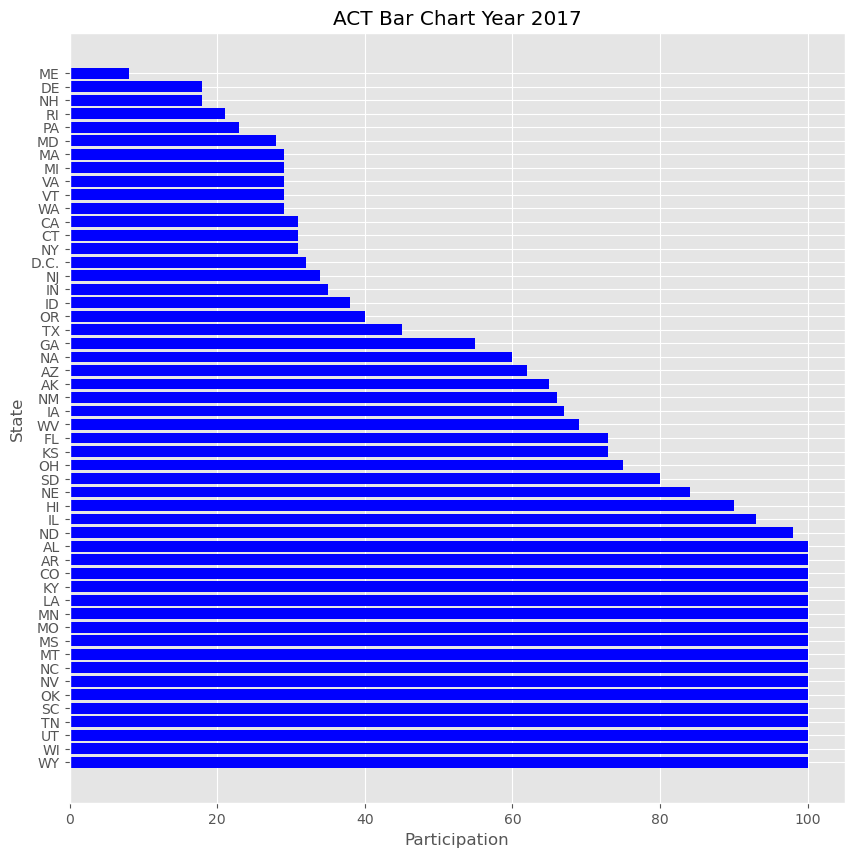

In [415]:
sorted_data = sorted(zip(act_2017_df['participation'],act_2017_df['state_abbr']), reverse=True)
sorted_values, sorted_categories = zip(*sorted_data)
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))  # Set the figure size (width, height)
plt.barh(sorted_categories, sorted_values, color='blue')
# Add title and labels
plt.title('ACT Bar Chart Year 2017')
plt.xlabel('Participation')
plt.ylabel('State')

Text(0, 0.5, 'State')

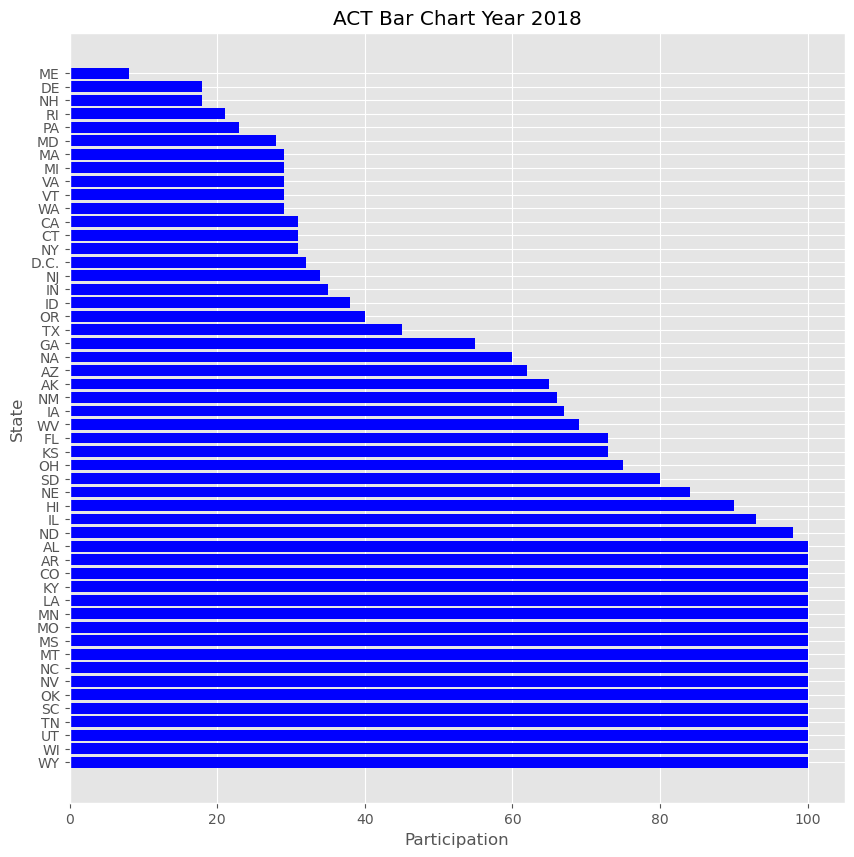

In [416]:
sorted_data2018 = sorted(zip(act_2018_df['participation'],act_2018_df['state']), reverse=True)
sorted_values2018, sorted_categories2018 = zip(*sorted_data)
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))  # Set the figure size (width, height)
plt.barh(sorted_categories2018, sorted_values2018, color='blue')
# Add title and labels
plt.title('ACT Bar Chart Year 2018')
plt.xlabel('Participation')
plt.ylabel('State')

Text(0, 0.5, 'State')

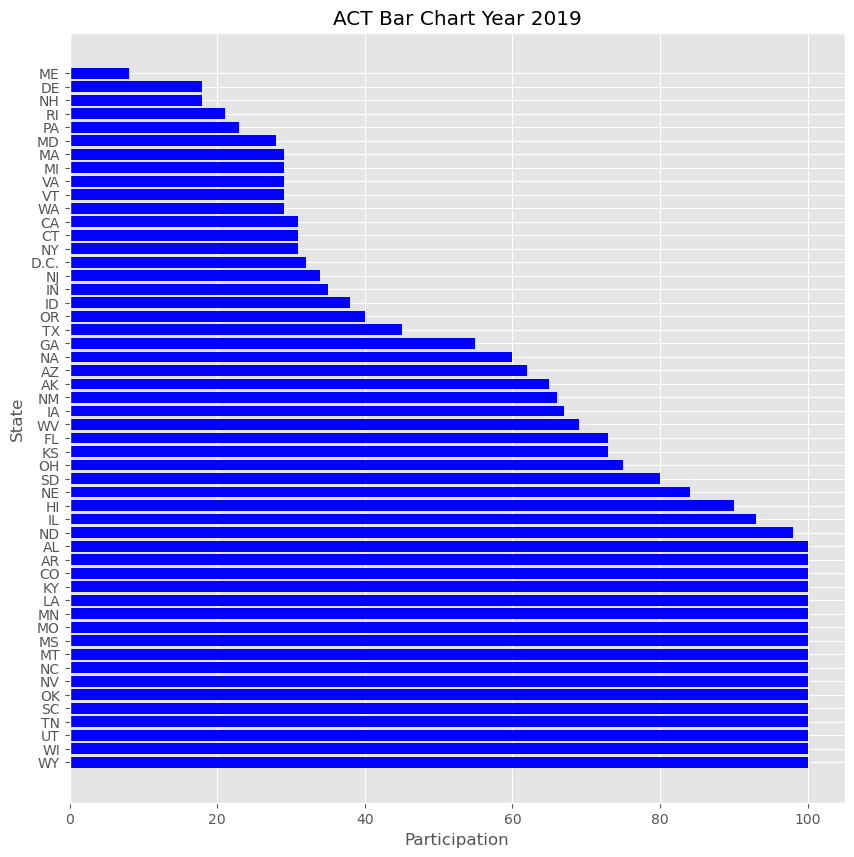

In [417]:
sorted_data2019 = sorted(zip(act_2019_df['participation'],act_2019_df['state']), reverse=True)
sorted_values2019, sorted_categories2019 = zip(*sorted_data)
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))  # Set the figure size (width, height)
plt.barh(sorted_categories2019, sorted_values2019, color='blue')
# Add title and labels
plt.title('ACT Bar Chart Year 2019')
plt.xlabel('Participation')
plt.ylabel('State')

Text(0, 0.5, 'State')

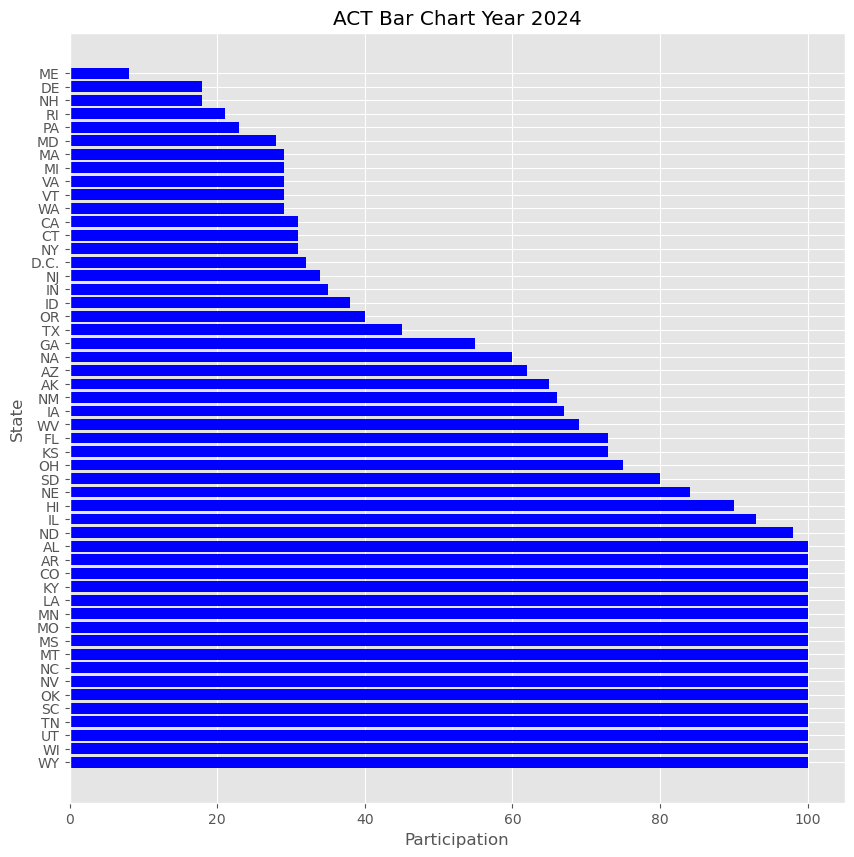

In [418]:
sorted_data2024 = sorted(zip(act_2024_df['participation'],act_2024_df['state']), reverse=True)
sorted_values2024, sorted_categories2024 = zip(*sorted_data)
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))  # Set the figure size (width, height)
plt.barh(sorted_categories2024, sorted_values2024, color='blue')
# Add title and labels
plt.title('ACT Bar Chart Year 2024')
plt.xlabel('Participation')
plt.ylabel('State')

### Participation Rate

In [419]:
# Calculate the mean population by year/state/other
mean_population = full_act.groupby('year')['participation'].mean().reset_index()

Text(0, 0.5, 'Participation Rate')

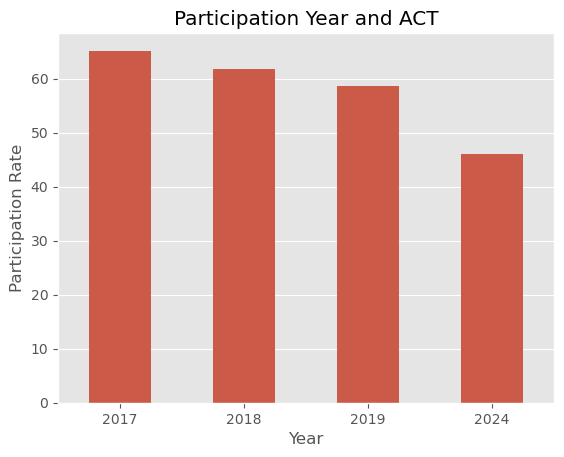

In [420]:
# Plot graph Select rows based on multiple criteria ACT  ...
sns.barplot(x='year',y='participation', data=mean_population, width=0.5)
plt.title('Participation Year and ACT');  # Reports average participation for each year
plt.xlabel('Year')
plt.ylabel('Participation Rate')

### Composite Score

In [459]:
# Calculate the mean population by year/state/other
mean_population2 = full_act.groupby('year')['composite'].mean().reset_index()

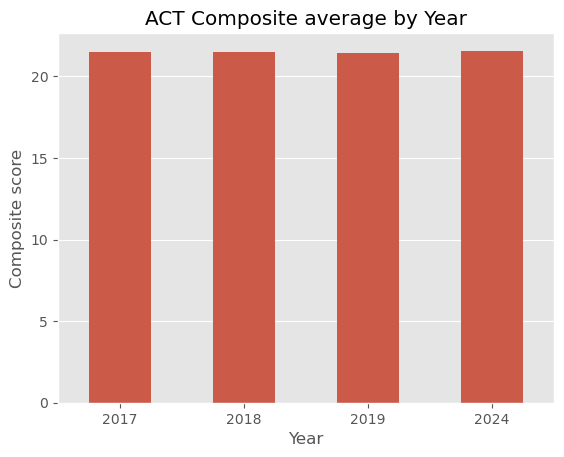

In [462]:
# Plot graph Select rows based on multiple criteria ACT  ...
sns.barplot(x='year',y='composite', data=mean_population2, width=0.5)
plt.title('ACT Composite average by Year');  # Reports average participation for each year
plt.xlabel('Year')
plt.ylabel('Composite score');

### Average ACT Score by State Year 2024

In [421]:
act_2024_df.head()

,state,participation,composite,year,state_abbr,region
0,Alabama,100,18.0,2024,AL,South
1,Alaska,14,20.4,2024,AK,West
2,Arizona,64,18.4,2024,AZ,West
3,Arkansas,93,18.8,2024,AR,South
4,California,4,26.5,2024,CA,West


In [422]:
df = act_2024_df
Top_sorted_df = df.sort_values(by='participation', ascending=False)
Bottom_sorted_df = df.sort_values(by='participation', ascending=True)

In [423]:
df.shape

(51, 6)

In [424]:
Top_sorted_df.head(10)

,state,participation,composite,year,state_abbr,region
0,Alabama,100,18.0,2024,AL,South
18,Louisiana,100,18.1,2024,LA,South
42,Tennessee,100,18.6,2024,TN,South
28,Nevada,100,17.3,2024,NV,West
24,Mississippi,100,17.8,2024,MS,South
50,Wyoming,100,19.2,2024,WY,West
34,North Dakota,96,19.2,2024,ND,Midwest
17,Kentucky,96,18.6,2024,KY,South
36,Oklahoma,94,17.9,2024,OK,South
27,Nebraska,94,19.4,2024,NE,Midwest


In [425]:
Bottom_sorted_df.head(10)

,state,participation,composite,year,state_abbr,region
19,Maine,2,25.1,2024,ME,Northeast
4,California,4,26.5,2024,CA,West
29,New Hampshire,5,25.7,2024,NH,Northeast
39,Rhode Island,5,25.2,2024,RI,Northeast
7,Delaware,5,24.9,2024,DE,South
47,Washington,7,24.6,2024,WA,West
38,Pennsylvania,7,24.4,2024,PA,Northeast
37,Oregon,7,23.0,2024,OR,West
22,Michigan,8,24.6,2024,MI,Midwest
45,Vermont,8,23.7,2024,VT,Northeast


Text(0.5, 0.98, 'Average ACT Score Percent Of Graduates Tested Categorical by State Plotting')

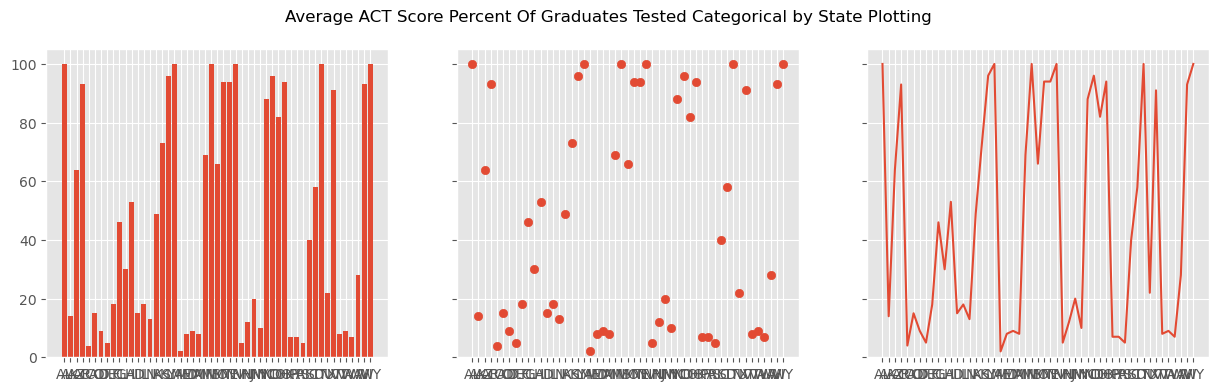

In [426]:
data = act_2024_df
names = act_2024_df['state_abbr']
values = act_2024_df['participation']

fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Average ACT Score Percent Of Graduates Tested Categorical by State Plotting')

Text(0.5, 0.98, 'Participation Rate Percent Of Graduates Tested Categorical by Region Plotting')

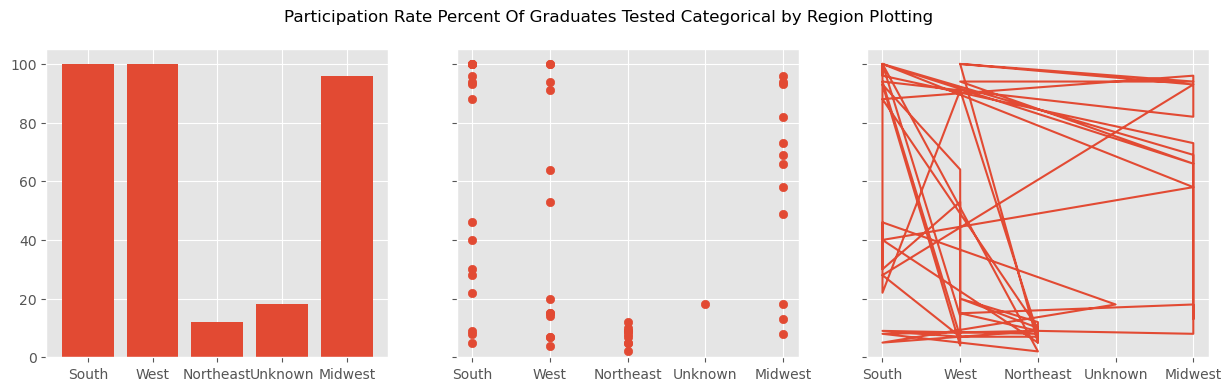

In [454]:
data2 = act_2024_df
names2 = act_2024_df['region']
values2 = act_2024_df['participation']

fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
axs[0].bar(names2, values2)
axs[1].scatter(names2, values2)
axs[2].plot(names2, values2)
fig.suptitle('Participation Rate Percent Of Graduates Tested Categorical by Region Plotting')

### Composite Score by Region

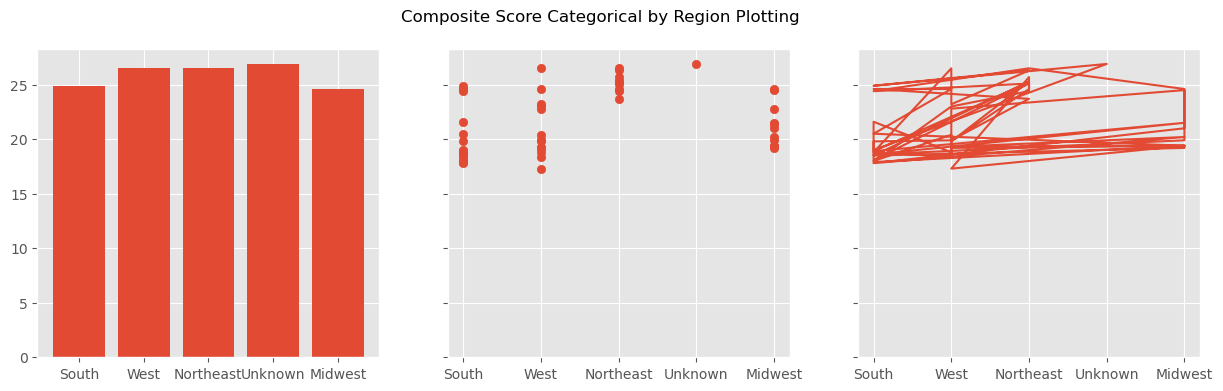

In [456]:
data2 = act_2024_df
names2 = act_2024_df['region']
values2 = act_2024_df['composite']

fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
axs[0].bar(names2, values2)
axs[1].scatter(names2, values2)
axs[2].plot(names2, values2)
fig.suptitle('Composite Score Categorical by Region Plotting');

In [428]:
full_act.head()

,state,participation,composite,year,state_abbr,region
0,National,60,21.0,2017,NA,Unknown
1,Alabama,100,19.2,2017,AL,South
2,Alaska,65,19.8,2017,AK,West
3,Arizona,62,19.7,2017,AZ,West
4,Arkansas,100,19.4,2017,AR,South


In [429]:
full_act.describe()

,participation,composite,year
count,206.000000,206.000000,206.000000
mean,57.898058,21.506796,2019.485437
std,35.108255,2.309905,2.691863
min,2.000000,17.300000,2017.000000
25%,25.000000,19.625000,2017.250000
50%,59.000000,21.050000,2018.500000
75%,100.000000,23.775000,2019.000000
max,100.000000,26.900000,2024.000000


In [430]:
full_act.isnull().sum()

state            0
participation    0
composite        0
year             0
state_abbr       0
region           0
dtype: int64

In [432]:
grouped_df = full_act.groupby(['year','region'])['participation'].mean()

In [433]:
grouped_df

year  region   
2017  Midwest      77.833333
      Northeast    24.888889
      South        76.062500
      Unknown      46.000000
      West         70.846154
2018  Midwest      75.833333
      Northeast    21.222222
      South        75.062500
      Unknown      32.000000
      West         62.615385
2019  Midwest      72.416667
      Northeast    17.666667
      South        70.687500
      Unknown      42.000000
      West         61.615385
2024  Midwest      59.916667
      Northeast     7.444444
      South        59.937500
      Unknown      18.000000
      West         44.923077
Name: participation, dtype: float64

### Participation Rate

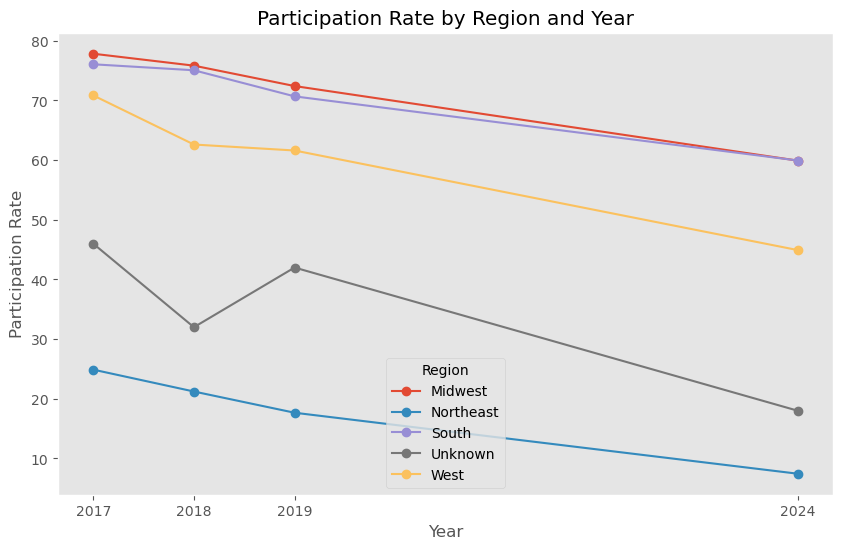

In [437]:
# 1. fillted by criteria  by participation  example region Midwest
# filtered_df = full_act[(full_act['region'] == 'Midwest')]

# 2. Group by region and year
grouped_df = full_act.groupby(['year','region'])['participation'].mean().reset_index()

# 3. Plotting
plt.figure(figsize=(10, 6))
for region in grouped_df['region'].unique():
    region_data = grouped_df[grouped_df['region'] == region]
    plt.plot(region_data['year'], region_data['participation'], marker='o', label=region)

# Plot the grouped data
plt.title('Participation Rate by Region and Year')
plt.xlabel('Year')
plt.ylabel('Participation Rate')
plt.xticks(grouped_df['year'].unique())
plt.legend(title='Region')
plt.grid()
plt.show()

### Composite score (ACT Score)

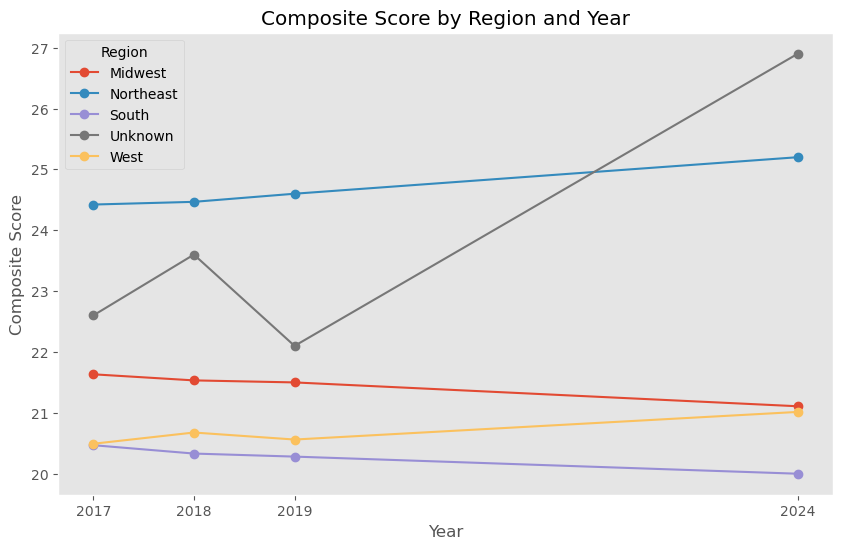

In [438]:
# 1. fillted by criteria  by participation  example region Midwest
# filtered_df = full_act[(full_act['region'] == 'Midwest')]

# 2. Group by region and year
grouped_df = full_act.groupby(['year','region'])['composite'].mean().reset_index()

# 3. Plotting
plt.figure(figsize=(10, 6))
for region in grouped_df['region'].unique():
    region_data = grouped_df[grouped_df['region'] == region]
    plt.plot(region_data['year'], region_data['composite'], marker='o', label=region)

# Plot the grouped data
plt.title('Composite Score by Region and Year')
plt.xlabel('Year')
plt.ylabel('Composite Score')
plt.xticks(grouped_df['year'].unique())
plt.legend(title='Region')
plt.grid()
plt.show()

### Heatmap by region

In [446]:
df = pd.DataFrame(full_act)
df

,state,participation,composite,year,state_abbr,region
0,National,60,21.0,2017,NA,Unknown
1,Alabama,100,19.2,2017,AL,South
2,Alaska,65,19.8,2017,AK,West
3,Arizona,62,19.7,2017,AZ,West
4,Arkansas,100,19.4,2017,AR,South
...,...,...,...,...,...,...
201,Virginia,9,24.6,2024,VA,South
202,Washington,7,24.6,2024,WA,West
203,West Virginia,28,20.5,2024,WV,South
204,Wisconsin,93,19.4,2024,WI,Midwest
